<table align="center">
  
</table>


<table align="center">
<thead>
  <tr>
    <td align="center"><a target="_blank" href="https://cae.au.dk/en/research/key-areas-in-research-and-development/design-and-construction/construction-automation-and-information-technologies/people/">
        <img src="https://mbg.au.dk/fileadmin/site_files/mb/Logoer/au/aulogo.jpg" style="padding-bottom:5px;" height="70px"/></a></td>
      <td align="center"><a target="_blank" href="https://colab.research.google.com/github/kakke14/TA_Content/blob/master/advanced_technologies_in_construction/lecture_3/RTLS_Lecture.ipynb">
            <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;"height="70px" /></a></td>
      <td align="center"><a target="_blank" href="https://github.com/kakke14/TA_Content">
            <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  /></a></td>
            
  </tr>
</thead>
<!-- <tbody> -->
  <tr>
    <td>Visit AU research Group</td>
    <td>Run in Google Colab</td>
    <td>View Source on GitHub</td>
  </tr>
</tbody>
</table>

In [2]:
# Copyright 2022 AU Digital Construction. All Rights Reserved.
# 
# Use or modification of this code outside of the course should reference:
# Emil L. Jacobsen, Karsten W. Johansen, and Christos Chronopoulos 
# Lecture Notes Digital Construction 2022

# Lecture 3 - Real Time Location Systems
In this lecture you will get exposed to Python programming and location data. You will learn how to process the raw data output into tangible knowledge that can be used to analyze trajectories of construction assets.
You will encounter several codeblocks with ***TO DO*** written in them. This is where you will have to follow the instructions and fill out the missing code before running the cell.

## Install dependencies
For all colab exercises, we will be needing several python libraries. Some of them will be repeating dependencies for all exercises, while other might only be used in certain examples. For this lecture, we will install the following

These libraries are part of the Kernel running i Colab and are therefore redy to be imported with the following lines


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from tqdm import tqdm

But how about a library that is not preinstalled ?? Unfortunately Traja is not.... 






In [4]:
# import traja

How do we get around missing libraries this ?? 
Normally it would just mean that we had to install the library with the python package manager called pip, using the command 'pip install [package name]'

If that is not possible, here is [Hint](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb)

In [5]:
#### TODO ####
# Install Traja lib on the colab Kernel 

#### Sollution ####

# !pip install Traja

Hopefully you managed to install Traja and will be able to run the "import traja" line below. 

Most of the packages in python are well documented and an example is this library, which documentation is available in the following link.

[Traja Docs](https://traja.readthedocs.io/en/latest/index.html)

We are not going to use Traja just yet but now we knwo how to install libraries if these are not pre-installed

In [6]:
import traja


### Checkpoint 1
Note the the following into a .txt file#

1.   What command is used to install libraries in the python package manager?
2.   What is needed in order to run the same command in colab?



## Install the remaining libraries

In [7]:
#### TODO ####
#install : 
# lib1
# lib 2

## Load the data
For this part we are going to use pandas, which is a library for working with dataframes
Pandas documentation: [Read function](https://pandas.pydata.org/docs/user_guide/io.html#io)

The data that will be the subject for this lecture is RTLS data, more specifically UWB data recorded with the system that we used on the Demo day. 
The data is written as comma seperated data and the collomns correspond to:
<Data Header>,<tag ID>,<X>,<Y>,<Z>,<battery>,<timestamp>,<unit>,<DQI>,<GDOP>,<Locate-Details>,<LF>


In [8]:
df = pd.read_csv("A.txt", names=["data_header","tag_id","x","y","z","battery","time","unit","dqi","gdop","locate_details"], converters = {'tag_ID': str})
df.head()

,data_header,tag_id,x,y,z,battery,time,unit,dqi,gdop,locate_details
0,T,0025CB03,12.14,12.50,1.52,12,1.618572e+09,1,0.11,G0.53,S01-S02-S04-S05
1,T,0025CB03,12.01,12.63,1.52,12,1.618572e+09,1,0.29,G0.53,S01-S02-S04-S05
2,T,0025CB03,12.06,12.67,1.52,12,1.618572e+09,1,1.01,G0.53,S01-S02-S04-S05
3,T,0025CB03,12.04,12.64,1.52,12,1.618572e+09,1,0.30,G0.53,S01-S02-S04-S05
4,T,0025CB03,12.01,12.62,1.52,12,1.618572e+09,1,0.29,G0.53,S04-S05-S01-S02


That is a lot of information... 
For our analysis we only need id, position(x,y), and time , therefore we drop the rest for now. but it is good to know that more data exists.


In [9]:
df = df[['tag_id','x','y','time']]

That was reading the data, it may be interesting to figure out how many tags that are present in the data
but are there any smart ways to do so ? 
It would be interesting to find the number of unique values in the "tag_ID" coloumn ?

In [10]:
unique_tags = df.tag_id.unique()
number_of_unique_tags = len(unique_tags)
print(f"There exists {number_of_unique_tags} in the tag_ID column and their IDs are: \n {unique_tags}")


There exists 5 in the tag_ID column and their IDs are: 
 ['0025CB03' '0025C9EB' '0025C9E6' '0025CAF6' '0025CB05']


Now, what is the total duration of the data collected?
Could ve use max and min value of a column? 
Does the time format seem wierd? [epoch time](https://www.epochconverter.com/)

In [11]:
df.time = pd.to_datetime(df.time.values.astype(float),unit='s')
df

,tag_id,x,y,time
0,0025CB03,12.14,12.50,2021-04-16 11:16:20.170000128
1,0025CB03,12.01,12.63,2021-04-16 11:16:20.306999808
2,0025CB03,12.06,12.67,2021-04-16 11:16:20.441999872
3,0025CB03,12.04,12.64,2021-04-16 11:16:20.579000064
4,0025CB03,12.01,12.62,2021-04-16 11:16:20.716999936
...,...,...,...,...
4690,0025C9EB,7.86,2.75,2021-04-16 11:19:15.657000192
4691,0025CAF6,2.54,0.30,2021-04-16 11:19:15.726000128
4692,0025CB03,11.93,12.45,2021-04-16 11:19:15.746000128
4693,0025CB05,1.51,11.68,2021-04-16 11:19:15.788999936


That format seems more normal 
Now we just need to find the min and max value [min and max](https://www.kite.com/python/answers/how-to-find-the-max-value-of-a-pandas-dataframe-column-in-python)

In [12]:
min = df.time.min()
max = df.time.max()
duration = max-min
print(duration)

0 days 00:02:55.621999872


Now we know how many tags that are in the data, and the duration

what if we did this calculation for all tags, to see if they were active for the full duration

In [13]:

for tag in unique_tags:
    min = df.loc[df.tag_id==tag].time.min()
    max = df.loc[df.tag_id==tag].time.max()
    duration = max-min
    print(f"the data duration for tag {tag} is  {duration}")

the data duration for tag 0025CB03 is  0 days 00:02:55.576000
the data duration for tag 0025C9EB is  0 days 00:02:54.980999936
the data duration for tag 0025C9E6 is  0 days 00:02:54.399000320
the data duration for tag 0025CAF6 is  0 days 00:02:54.656000256
the data duration for tag 0025CB05 is  0 days 00:02:45.862999808


## Checkpoint 2

What is the percentage duration of each tag relative to the tag that has the longest duration?

Extend the above code to calculate this

In [14]:
durations = []

for tag in unique_tags:
    min = df.loc[df.tag_id==tag].time.min()
    max = df.loc[df.tag_id==tag].time.max()
    duration = max-min
    durations.append(duration)
    # print(f"the data duration for tag {tag} is  {duration}")
max_duration = np.max(durations)
print(max_duration)
for tag in unique_tags:
    min = df.loc[df.tag_id==tag].time.min()
    max = df.loc[df.tag_id==tag].time.max()
    duration = max-min
    pct_duration = round((duration/max_duration)*100,2)
    print(f"the data duration for tag {tag} is {duration} ~ {pct_duration}%")


0 days 00:02:55.576000
the data duration for tag 0025CB03 is 0 days 00:02:55.576000 ~ 100.0%
the data duration for tag 0025C9EB is 0 days 00:02:54.980999936 ~ 99.66%
the data duration for tag 0025C9E6 is 0 days 00:02:54.399000320 ~ 99.33%
the data duration for tag 0025CAF6 is 0 days 00:02:54.656000256 ~ 99.48%
the data duration for tag 0025CB05 is 0 days 00:02:45.862999808 ~ 94.47%


## Plotting the trajectory data
In python there are several libraries for plotting data, and Matplitlib is one of those. Matplotlib offers a great amout of features (if you are used to matlab, matplotlib can do the same, but maybe in a different way)

[Matplotlib tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

The tutorial contains this example, which we will take inspiration from (but slightly change):

```
import matplotlib.pyplot as plt
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

figure = plt.figure(figsize=(12, 4))

ax1 = figure.add_subplot(131)
ax1.bar(names, values)
ax2 = figure.add_subplot(132)
ax2.scatter(names, values)
ax3 = figure.add_subplot(133)
ax3.plot(names, values)
figure.suptitle('Categorical Plotting')
```

NB. also part of slides!

C:\Users\au516160\AppData\Local\Temp/ipykernel_21556/875343385.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


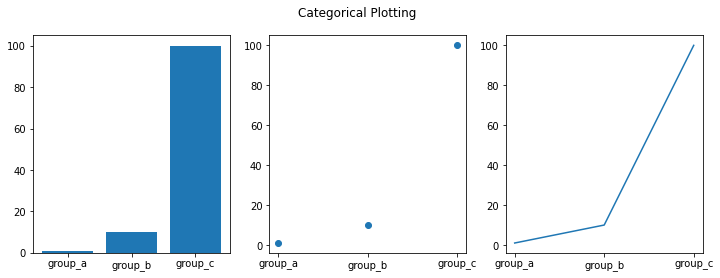

In [15]:
# try to run the code to get an overview of the different plotting funtions

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

figure = plt.figure(figsize=(12, 4))

ax1 = figure.add_subplot(131)
ax1.bar(names, values)
ax2 = figure.add_subplot(132)
ax2.scatter(names, values)
ax3 = figure.add_subplot(133)
ax3.plot(names, values)
figure.suptitle('Categorical Plotting')
figure.show()

In [16]:
%matplotlib qt
figure = plt.figure(figsize=(10,10))
axs = figure.add_subplot(221)
current_tag = None
for tag in unique_tags:
    current_tag  =  df.loc[df.tag_id==tag]
    # you can access the x, and y values through the "dot operator", e.g., current_tag.X
    # what kind of plot makes sense when plotting trajectories? 
    # Instead of using the defaul plt object we use the plot object called "axs", that is added to the figure called "figure" 
    #### Sollution ### 
    axs.plot(current_tag.x, current_tag.y,'-', label=tag,linewidth=1)
    break
# now set the title of the plot to somthing meaningfull e.g., incomming data, or unfiltered data
# Also pleae add a label for the x, and y-axis e.g, X [m] and Y [m]
# and make sure that the legends are shown 
#### Sollution ### 
axs.set_title("Original data")
axs.set_xlabel("X [m]")
axs.set_ylabel("Y [m]")
axs.legend()


## Checkpoint 3 
Does you plot look similar to this ? (**not neccesarily the colors)

<img src="Images/CP3.png" style="padding-bottom:5px;" height="300px"/>


## Moving on to the next step of handling data in this programming approach
the data we just plotted seems to be rather messy and to contain quite some noise

Any filters that we could apply ? how would a moving average filter effect the data?

In [17]:

axs = figure.add_subplot(222)
MM_current_tag = current_tag.copy()
MM_current_tag.x = current_tag.x.rolling(10).mean()
MM_current_tag.y = current_tag.y.rolling(10).mean()
axs.plot(MM_current_tag.x, MM_current_tag.y,'-', label=tag,linewidth=1)

axs.set_title("Moving Avg. 10")
axs.set_xlabel("X [m]")
axs.set_ylabel("Y [m]")
axs.legend()
figure.show()

In [18]:
axs = figure.add_subplot(223)
MM_current_tag = current_tag.copy()
MM_current_tag.x = current_tag.x.rolling(20).mean()
MM_current_tag.y = current_tag.y.rolling(20).mean()
axs.plot(MM_current_tag.x, MM_current_tag.y,'-', label=tag,linewidth=1)

axs.set_title("Moving Avg. 20")
axs.set_xlabel("X [m]")
axs.set_ylabel("Y [m]")
axs.legend()
figure.show()

In [19]:
axs = figure.add_subplot(224)
MM_current_tag = current_tag.copy()
MM_current_tag.x = current_tag.x.rolling(30).mean()
MM_current_tag.y = current_tag.y.rolling(30).mean()
axs.plot(MM_current_tag.x, MM_current_tag.y,'-', label=tag,linewidth=1)

axs.set_title("Moving Avg. 30")
axs.set_xlabel("X [m]")
axs.set_ylabel("Y [m]")
axs.legend()
figure.show()

Describe with words, how a simple moving average effect the data, and its validity


## Now lets try build our own filtering algoritm
could we use some domain knowledge about where the tags were placed

what about filtering based on speed ? 
what about filtering based on displacement ?

We refer to this type of filtering, domain knowledge based filtering, as we e.g., can derive maximum verlocities if we know who/what carried the tag.

An easy way to extract verlocity and displacement information from a trajectory is to use [get_derivatives()](https://traja.readthedocs.io/en/latest/calculations.html#derivatives), which is a part of the Trja package that we installed earlier.

How do we "mask" data ? 
A mask is a series of indexes and boolean values.
```
0. True
1. False
.. ....
30. False
31. etc....
```
In order to create such a mask we "ask" a question imagine this dataframe
```
dataframe = 

idx height  gender
0.  180     male
1.  200     female
2.  160     male
3.  170     non-binary
```
Then we could as for the entries, where gender is male, and height is more than 170cm 

```
mask = (dataframe.gender==male) & (dataframe.height>=170)

```
resuling in: 
```
mask = 
0. True
1. False
2. False
3. False
```

Now we can use this mask to get the dataframe that fulfills our query:

```
queried_data = datafram.loc[mask]
queried_data = 

idx height  gender
0.  180     male
```
Another way to do this is to create the mask in the query

```
queried_data = datafram.loc[(dataframe.gender==male) & (dataframe.height>=170)]
queried_data = 

idx height  gender
0.  180     male
```
here is some further information on [Masks](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html) in pandas 

## Domain knowledge 

okay now that we know how to mask and query data we are ready to get find out, what we want to query.

We know:
1. only human workers did carrie the tags
2. humans do not walk faster than 7.2 km/h as they should not run on a construction site 






In [20]:
# create a copy of the incomming data
df_copy = df.copy()
# change the time back to seconds 
df_copy.time = (df_copy.time.values.astype(float))*10**-9

#create figure for the plots
figure = plt.figure(figsize=(10,10))
# add a plot to the figure
axs = figure.add_subplot(221)


tag_under_investigation = unique_tags[0] # get the id of the first available tag

# Query the data for the tag under investigation
df_tag = df_copy.loc[df_copy.tag_id == tag_under_investigation]
# plot the original/incomming/unfiltered dat for this tag
axs.plot(df_tag.x, df_tag.y,'-', label=tag,linewidth=1)
# configure the title, axis-lables, and activate legends 
axs.set_title("Original Data")
axs.set_xlabel("X [m]")
axs.set_ylabel("Y [m]")
axs.legend()


# use traja to calculate the derivatived of the dataframe
derivatives = df_tag.traja.get_derivatives() 
# print the head of the datafram, which will print the first 5 rows and column names 
print(derivatives.head())
# create a mask that is true for values below 2 m/s and above -2m/s
mask1 = derivatives.speed<2
mask2 = derivatives.speed>-2 
maskspeed  = mask1 & mask2
#query that portion of data
df_tag_speed = df_tag.loc[maskspeed]

#add a plot to the figure from before 
axs = figure.add_subplot(222)   
#plot the queried data 
axs.plot(df_tag_speed.x, df_tag_speed.y,'-', label=tag,linewidth=1)
# set title, lables and activate legends
axs.set_title("filter based on speed 2m/s")
axs.set_xlabel("X [m]")
axs.set_ylabel("Y [m]")
axs.legend()
figure.show()


# now do the same for displacement, where the diplacement (-1 < displacemen < 1)
mask1 = derivatives.displacement<1
mask2 = derivatives.displacement>-1 
maskdisplace  = mask1 & mask2
df_disp = df_tag_speed.loc[maskdisplace]

axs = figure.add_subplot(223)   
axs.plot(df_disp.x, df_disp.y,'-', label=tag,linewidth=1)
axs.set_title("Displacement 1m")
axs.set_xlabel("X [m]")
axs.set_ylabel("Y [m]")
axs.legend()
figure.show()



   displacement  displacement_time     speed  speed_times  acceleration  \
0           NaN              0.000       NaN          NaN           NaN   
1      0.183848              0.137  1.341958        0.137           NaN   
2      0.064031              0.272  0.474306        0.272     -6.427058   
3      0.036056              0.409  0.263178        0.409     -1.541071   
4      0.036056              0.547  0.261272        0.547     -0.013812   

   acceleration_times  
0                 NaN  
1                 NaN  
2               0.272  
3               0.409  
4               0.547  


## trying to add another of the shelf filtering algorithm
The second filtering algorithm is a more sofisticated one. It is called [Savitzky–Golay](https://www.wikiwand.com/en/Savitzky%E2%80%93Golay_filter). 
It can be compared to fitting the data to a higher degree polynomial.

[traja.smooth_sg(data, window)](https://traja.readthedocs.io/en/latest/calculations.html)

In [21]:
# add another plot in teh last position (224) to the figure from before 
axs = figure.add_subplot(224)
# apply the sg_filter from the traja library
sg_filtered = traja.smooth_sg(df_tag_speed,w=7) 
#plot the data 
axs.plot(sg_filtered.x, sg_filtered.y,'-', label=tag,linewidth=1)
# set the title, axis-labels and show legends 
axs.set_title("Savitzky-Golay filtering")
axs.set_xlabel("X [m]")
axs.set_ylabel("Y [m]")
axs.legend()
figure.show()

## Playing around with the filter 
Try to change the polynomial degree of the filter, and see the difference. 

What effet does the polynomial degree have? 

# Lets create some functions to handle this
Here is some info on [creating funcitons](https://www.w3schools.com/python/python_functions.asp)

In [22]:
def filter_dataframe(dataframe_to_filter, sg_window=7):
    data_copy_in =dataframe_to_filter.copy()
    data_copy_in.time = (data_copy_in.time.values.astype(float))*10**-9
    copy_df=pd.DataFrame(columns=data_copy_in.columns)
    for tag in data_copy_in.tag_id.unique():
        df_tag = data_copy_in.loc[data_copy_in.tag_id == tag]
        # print(len(df_tag))
        derivatives = df_tag.traja.get_derivatives() 
        #speed 
        mask1 = derivatives.speed<2
        mask2 = derivatives.speed>-2 
        maskspeed  = mask1 & mask2
        df_tag = df_tag.loc[maskspeed]
        #displacement
        mask1 = derivatives.displacement<1
        mask2 = derivatives.displacement>-1 
        maskdisplace  = mask1 & mask2
        df_tag = df_tag.loc[maskdisplace]
        #sg filtering
        if len(df_tag)< sg_window:
            continue
        df_tag = traja.smooth_sg(df_tag,w=sg_window)
        copy_df = copy_df.append(df_tag)
    return copy_df


## Are there others?

Do you happen to know other location data filtering algorithms?

What is the most used one for trajectory data?

Are there any python implementations available ?

# In area analyis
What if we wanted to investigate how much time a tag (person) spend in a specific area? e.g., if an area is off limit due to safety resriction, progress analysis or somthing else
Here we have at least two options:
1. To use the mask approach that we just did - This is fine as we want to check a square bounding box
2. Use a polygon, and check wether a point is inside or not - handy if we wanna check more sophisticated areas 

We will start with the first approach for one tag only

In [23]:
# exclude data from other tags than 0025CB03 from the SG-filtered data
mask_id = sg_filtered.tag_id == "0025CB03"
data_for_tag = sg_filtered.loc[mask_id]
area = {
    "x_min":11,
    "y_min":11,
    "x_max":13,
    "y_max":13
}
# print(area["x_min"])
mask_x  = ((sg_filtered.x >= area["x_min"]) & (sg_filtered.x<= area["x_max"]))

mask_y  = ((sg_filtered.y >= area["y_min"]) & (sg_filtered.y <= area["y_max"]))

mask_inside_area = (mask_x & mask_y)

data_inside_area = sg_filtered.loc[mask_inside_area]
list_of_continues_visits=[]
current_visit=[]
for idx, row in enumerate(data_inside_area.iterrows()):
    # print(row[1]["time"])
    time_for_row =  row[1]["time"]
    if not current_visit: # check if empty
        current_visit.append(time_for_row)
        continue
    elif time_for_row-current_visit[-1]<1: # less than one seccond
        current_visit.append(time_for_row)
        continue
    elif time_for_row-current_visit[-1]>=1: # more than or equal to one seccond
        if len(current_visit)>1:
            list_of_continues_visits.append(current_visit)
        current_visit = [] #empty current visit, and continue

for idx, visit in enumerate(list_of_continues_visits):
    duration  = visit[-1]-visit[1]
    print(f"Visit #{idx} had duration of {round(duration,2)} s")

Visit #0 had duration of 9.27 s
Visit #1 had duration of 10.5 s
Visit #2 had duration of 0.0 s
Visit #3 had duration of 5.85 s
Visit #4 had duration of 0.82 s
Visit #5 had duration of 17.44 s


# How about a proximity analysis 
There can be several reasons to be interested in a persons proximity to objects, heavy macinery such as crane hook, excavator , or event other persons(e.g., Covid-19 regualtion) 


In [24]:

filtered_df = filter_dataframe(df)
tag_under_investigation = "0025CB03"
mask_id = filtered_df.tag_id == tag_under_investigation
data_for_tag = filtered_df.loc[mask_id]
remaining_data = filtered_df.loc[~mask_id]
incidents = pd.DataFrame(columns=remaining_data.columns)

for row in tqdm(data_for_tag.iterrows()):
    time = row[1]["time"]
    x = row[1]["x"]
    y = row[1]["y"]
    for row_2 in remaining_data.iterrows():
        time_2 = row_2[1]["time"]
        x_2 = row_2[1]["x"]
        y_2 = row_2[1]["y"]
        if abs(time-time_2)<1:
            distance = sqrt((x-x_2)**2 + (y-y_2)**2)
            if distance <= 1:
                incidents = incidents.append(row_2[1])

figure = plt.figure(figsize=(10,10))
axs = figure.add_subplot(111)

axs.plot(data_for_tag.x, data_for_tag.y,'-', label=tag,linewidth=1)
axs.plot(incidents.x, incidents.y,'r*', label="Incidents",linewidth=1)
axs.set_title("incidents")
axs.set_xlabel("X [m]")
axs.set_ylabel("Y [m]")
axs.legend()
figure.show()

536it [00:40, 13.31it/s]


# Incident report analysis
Can we say somthing more detailed about the incidents ?

1. How many incidents were mad by each individual tag?
2. Turn te above into a function and run in for loop and make the analysis for all tags
3. Print a nice report using the print(f"text {variable}") way
4. Create a confusion matrix-plot for easier overview
5. Calculate the number of incidents in [20cm, 40cm, 60cm, 80cm, 100cm] and make bar-plot 

In [25]:
# 1
for tag in unique_tags:
    if tag == tag_under_investigation:
        continue
    mask_id = (incidents.tag_id == tag)
    print(f"tag_id {tag} had {mask_id.sum()} proximity incidents with {tag_under_investigation}")

# 2
def proximity_analysis(df):
    result = []
    for tag in unique_tags:
        tag_under_investigation = tag
        mask_id = filtered_df.tag_id == tag_under_investigation
        data_for_tag = filtered_df.loc[mask_id]
        remaining_data = filtered_df.loc[~mask_id]
        incidents = pd.DataFrame(columns=remaining_data.columns)
        for row in tqdm(data_for_tag.iterrows()):
            time = row[1]["time"]
            x = row[1]["x"]
            y = row[1]["y"]
            for row_2 in remaining_data.iterrows():
                time_2 = row_2[1]["time"]
                x_2 = row_2[1]["x"]
                y_2 = row_2[1]["y"]
                if abs(time-time_2)<1:
                    distance = sqrt((x-x_2)**2 + (y-y_2)**2)
                    if distance <= 1:
                        incidents = incidents.append(row_2[1])
        dictionary = {
            "analyzed_id":tag,
            "data_frame":incidents
        }
        result.append(dictionary)
    return result
result_list = proximity_analysis(filtered_df)

tag_id 0025C9EB had 11 proximity incidents with 0025CB03
tag_id 0025C9E6 had 4 proximity incidents with 0025CB03
tag_id 0025CAF6 had 0 proximity incidents with 0025CB03
tag_id 0025CB05 had 6 proximity incidents with 0025CB03


536it [00:39, 13.60it/s]
732it [00:48, 14.99it/s]
674it [00:46, 14.62it/s]
603it [00:42, 14.10it/s]
161it [00:14, 11.46it/s]


In [26]:
#3
def report_incidents(incidents_result):
    for dictionary in incidents_result:
        tag_under_investigation = dictionary["analyzed_id"]
        incidents = dictionary["data_frame"]
        print(f"tag_id {tag_under_investigation} had {len(incidents)} incidents in total")
        for tag in unique_tags:
            if tag == tag_under_investigation:
                continue
            mask_id = (incidents.tag_id == tag)
            print(f"\t {mask_id.sum()} proximity incidents with {tag}")
report_incidents(result_list)

tag_id 0025CB03 had 21 incidents in total
	 11 proximity incidents with 0025C9EB
	 4 proximity incidents with 0025C9E6
	 0 proximity incidents with 0025CAF6
	 6 proximity incidents with 0025CB05
tag_id 0025C9EB had 44 incidents in total
	 11 proximity incidents with 0025CB03
	 15 proximity incidents with 0025C9E6
	 3 proximity incidents with 0025CAF6
	 15 proximity incidents with 0025CB05
tag_id 0025C9E6 had 30 incidents in total
	 4 proximity incidents with 0025CB03
	 15 proximity incidents with 0025C9EB
	 3 proximity incidents with 0025CAF6
	 8 proximity incidents with 0025CB05
tag_id 0025CAF6 had 7 incidents in total
	 0 proximity incidents with 0025CB03
	 3 proximity incidents with 0025C9EB
	 3 proximity incidents with 0025C9E6
	 1 proximity incidents with 0025CB05
tag_id 0025CB05 had 30 incidents in total
	 6 proximity incidents with 0025CB03
	 15 proximity incidents with 0025C9EB
	 8 proximity incidents with 0025C9E6
	 1 proximity incidents with 0025CAF6


In [27]:
#4
import seaborn as sn
def generate_confusion_matrix (incidents_result):
    matrix = []
    for dictionary in incidents_result:
        tag_under_investigation = dictionary["analyzed_id"]
        incidents = dictionary["data_frame"]
        print(f"tag_id {tag_under_investigation} had {len(incidents)} incidents in total")
        row = []
        for tag in unique_tags:
            # if tag == tag_under_investigation:
            #     continue
            mask_id = (incidents.tag_id == tag)
            row.append(mask_id.sum())
            print(f"\t {mask_id.sum()} proximity incidents with {tag}")
        matrix.append(row)

    return matrix
confusion_matrix = generate_confusion_matrix(result_list)
print(confusion_matrix)
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in unique_tags],
                  columns = [i for i in unique_tags])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

tag_id 0025CB03 had 21 incidents in total
	 0 proximity incidents with 0025CB03
	 11 proximity incidents with 0025C9EB
	 4 proximity incidents with 0025C9E6
	 0 proximity incidents with 0025CAF6
	 6 proximity incidents with 0025CB05
tag_id 0025C9EB had 44 incidents in total
	 11 proximity incidents with 0025CB03
	 0 proximity incidents with 0025C9EB
	 15 proximity incidents with 0025C9E6
	 3 proximity incidents with 0025CAF6
	 15 proximity incidents with 0025CB05
tag_id 0025C9E6 had 30 incidents in total
	 4 proximity incidents with 0025CB03
	 15 proximity incidents with 0025C9EB
	 0 proximity incidents with 0025C9E6
	 3 proximity incidents with 0025CAF6
	 8 proximity incidents with 0025CB05
tag_id 0025CAF6 had 7 incidents in total
	 0 proximity incidents with 0025CB03
	 3 proximity incidents with 0025C9EB
	 3 proximity incidents with 0025C9E6
	 0 proximity incidents with 0025CAF6
	 1 proximity incidents with 0025CB05
tag_id 0025CB05 had 30 incidents in total
	 6 proximity incidents wi

In [28]:
#5
def proximity_analysis(df):
    result = []
    for tag in unique_tags:
        tag_under_investigation = tag
        mask_id = filtered_df.tag_id == tag_under_investigation
        data_for_tag = filtered_df.loc[mask_id]
        remaining_data = filtered_df.loc[~mask_id]
        incidents = pd.DataFrame(columns=remaining_data.columns)
        distances = []
        for row in tqdm(data_for_tag.iterrows()):
            time = row[1]["time"]
            x = row[1]["x"]
            y = row[1]["y"]
            for row_2 in remaining_data.iterrows():
                time_2 = row_2[1]["time"]
                x_2 = row_2[1]["x"]
                y_2 = row_2[1]["y"]
                if abs(time-time_2)<1:
                    distance = sqrt((x-x_2)**2 + (y-y_2)**2)
                    if distance <= 1:
                        distances.append(distance)
                        incidents = incidents.append(row_2[1])
        incidents["distances"]=distances
        dictionary = {
            "analyzed_id":tag,
            "data_frame":incidents
        }
        result.append(dictionary)
    return result
result_list = proximity_analysis(filtered_df)


536it [00:39, 13.59it/s]
732it [00:49, 14.67it/s]
674it [00:46, 14.34it/s]
603it [00:42, 14.06it/s]
161it [00:13, 11.58it/s]


In [29]:
#5 continued
result_dictionary = {
    "0-20cm":0,
    "21-40cm":0,
    "41-60cm":0,
    "61-80cm":0,
    "81-100cm":0
}
for dictionary in result_list:
    incidents = dictionary["data_frame"]
    mask_20 = ((incidents.distances>=.0)&(incidents.distances<=.20))
    mask_40 = ((incidents.distances>=.21)&(incidents.distances<=.40))
    mask_60 = ((incidents.distances>=.41)&(incidents.distances<=.60))
    mask_80 = ((incidents.distances>=.61)&(incidents.distances<=.80))
    mask_100 = ((incidents.distances>=.81)&(incidents.distances<=1))
    result_dictionary["0-20cm"] += mask_20.sum()
    result_dictionary["21-40cm"] += mask_40.sum()
    result_dictionary["41-60cm"] += mask_60.sum()
    result_dictionary["61-80cm"] += mask_80.sum()
    result_dictionary["81-100cm"] += mask_100.sum()

plt.figure(figsize = (10,7))
plt.bar(result_dictionary.keys(),result_dictionary.values())
plt.show()
